In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import csv

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [4]:
data_tr=pd.read_csv("../data/wdaycount.csv",header = 0)
wday =  np.array(data_tr['wday'])
print(wday)
year_month =  np.array(data_tr['year_month'])
print(year_month)
n =  np.array(data_tr['n'])
print(n)

[1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2
 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7 1 2 3 4
 5 6 7 1 2 3 4 5 6 7 1 2 3 4 5 6 7]
['2016-10' '2016-10' '2016-10' '2016-10' '2016-10' '2016-10' '2016-10'
 '2016-11' '2016-11' '2016-11' '2016-11' '2016-11' '2016-11' '2016-11'
 '2017-01' '2017-01' '2017-01' '2017-01' '2017-01' '2017-01' '2017-01'
 '2017-02' '2017-02' '2017-02' '2017-02' '2017-02' '2017-02' '2017-02'
 '2017-03' '2017-03' '2017-03' '2017-03' '2017-03' '2017-03' '2017-03'
 '2017-04' '2017-04' '2017-04' '2017-04' '2017-04' '2017-04' '2017-04'
 '2017-05' '2017-05' '2017-05' '2017-05' '2017-05' '2017-05' '2017-05'
 '2017-06' '2017-06' '2017-06' '2017-06' '2017-06' '2017-06' '2017-06'
 '2017-07' '2017-07' '2017-07' '2017-07' '2017-07' '2017-07' '2017-07'
 '2017-08' '2017-08' '2017-08' '2017-08' '2017-08' '2017-08' '2017-08'
 '2017-09' '2017-09' '2017-09' '2017-09' '2017-09' '2017-09' '2017-09'
 '2017-10' '2017-10' '2017-10' '2

In [18]:
data_tr=pd.read_csv("../data/data_season_state.csv",header = 0)
season =  np.array(data_tr['season'])
# print(wday)
state =  np.array(data_tr['state'])
# print(year_month)
records =  np.array(data_tr['records'])
# print(n)

In [12]:
grid2 = {'depth': season,
         'child_weight': state,
         'error': records
        }
# param_grid2 = {'depth': np.array([3,5,7,9]),
#          'child_weight': np.array([1,3,5])
#               }
res2 = pd.DataFrame(grid2)
res2.head()

,child_weight,depth,error
0,AK,1,3859
1,AL,1,19862
2,AR,1,13081
3,AZ,1,40418
4,CA,1,229417


In [19]:
set(state)

{'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY'}

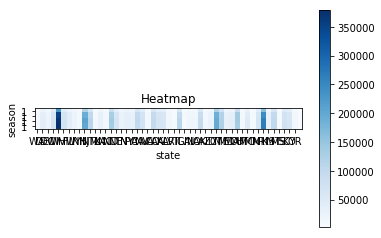

In [20]:
plt.title("Heatmap")
plt.imshow(res2.error.values.reshape(4, 51), cmap=plt.cm.Blues)
plt.yticks(range(4), season)
plt.ylabel("season")
plt.xticks(range(50), set(state))
plt.xlabel("state")
plt.colorbar()
plt.show()

In [16]:
grid2 = {'depth': np.array([3,3,3,5,5,5,7,7,7,9,9,9]),
         'child_weight': np.array([1,3,5,1,3,5,1,3,5,1,3,5]),
         'error': np.array([0.0880000, 0.09133333, 0.08300000,
                            0.0930000, 0.09466667, 0.09400000,
                            0.1023333, 0.09466667, 0.09966667,
                            0.1053333, 0.10033333, 0.09533333])
        }
param_grid2 = {'depth': np.array([3,5,7,9]),
         'child_weight': np.array([1,3,5])
              }
res2 = pd.DataFrame(grid2)
res2.head()

,child_weight,depth,error
0,1,3,0.088000
1,3,3,0.091333
2,5,3,0.083000
3,1,5,0.093000
4,3,5,0.094667


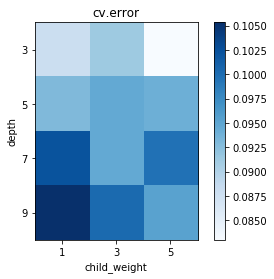

In [17]:
plt.title("cv.error")
plt.imshow(res2.error.values.reshape(4, 3), cmap=plt.cm.Blues)
plt.yticks(range(len(param_grid2['depth'])), param_grid2['depth'])
plt.ylabel("depth")
plt.xticks(range(len(param_grid2['child_weight'])), param_grid2['child_weight'])
plt.xlabel("child_weight")
plt.colorbar()
plt.show()

In [18]:
grid2 = {'depth': np.array([3,3,3,5,5,5,7,7,7,9,9,9]),
         'child_weight': np.array([1,3,5,1,3,5,1,3,5,1,3,5]),
         'error': np.array([0.09166667, 0.09366667, 0.09100000,
                            0.09833333, 0.09700000, 0.09133333,
                            0.10266667, 0.10333333, 0.10333333,
                            0.10733333, 0.10100000, 0.09933333])
        }
param_grid2 = {'depth': np.array([3,5,7,9]),
         'child_weight': np.array([1,3,5])
              }
res2 = pd.DataFrame(grid2)
res2.head()

,child_weight,depth,error
0,1,3,0.091667
1,3,3,0.093667
2,5,3,0.091000
3,1,5,0.098333
4,3,5,0.097000


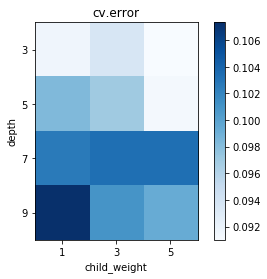

In [19]:
plt.title("cv.error")
plt.imshow(res2.error.values.reshape(4, 3), cmap=plt.cm.Blues)
plt.yticks(range(len(param_grid2['depth'])), param_grid2['depth'])
plt.ylabel("depth")
plt.xticks(range(len(param_grid2['child_weight'])), param_grid2['child_weight'])
plt.xlabel("child_weight")
plt.colorbar()
plt.show()